Dataset Created:
   SleepHours  ScreenTime  PhysicalActivity  HeartRate  Workload StressLevel
0    7.745071    6.250449         25.565249  63.760645  6.115445         Low
1    6.792604    5.141189         43.536417  64.808905  4.873730         Low
2    7.971533    6.244595         29.066398  92.498121  1.930013         Low
3    9.284545    7.086596         34.566898  72.006828  3.442596         Low
4    6.648770    6.097720         73.469042  79.821300  4.421957         Low


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



===== Logistic Regression Report =====
              precision    recall  f1-score   support

        High       0.00      0.00      0.00         2
         Low       0.71      0.76      0.74       130
      Medium       0.67      0.63      0.65       108

    accuracy                           0.70       240
   macro avg       0.46      0.46      0.46       240
weighted avg       0.69      0.70      0.69       240


===== Random Forest Report =====
              precision    recall  f1-score   support

        High       0.00      0.00      0.00         2
         Low       0.69      0.71      0.70       130
      Medium       0.62      0.61      0.62       108

    accuracy                           0.66       240
   macro avg       0.44      0.44      0.44       240
weighted avg       0.65      0.66      0.66       240



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

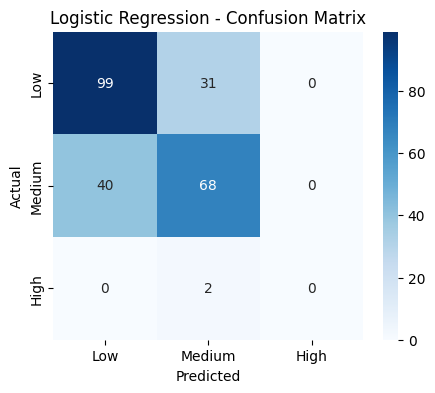

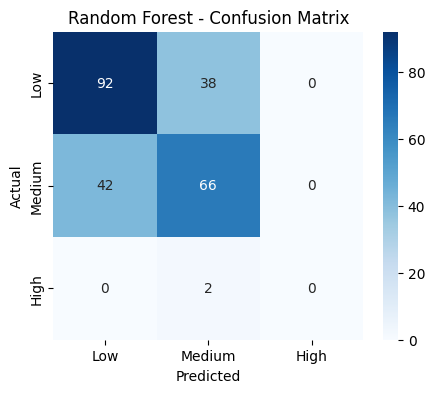


Random Forest Feature Importance:
            Feature  Importance
4          Workload    0.234398
0        SleepHours    0.225326
2  PhysicalActivity    0.198624
3         HeartRate    0.178091
1        ScreenTime    0.163560


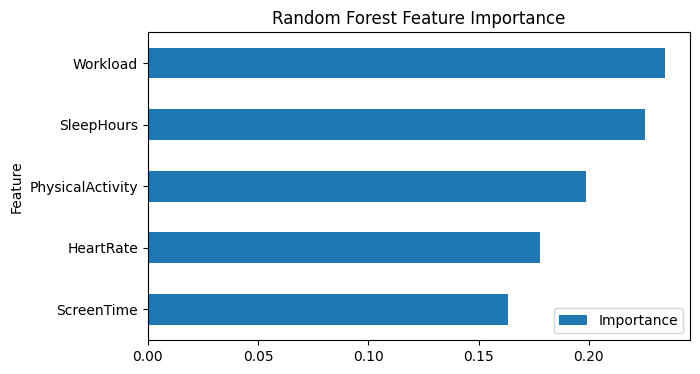


Logistic Regression Coefficients:
            Feature  Coefficient Magnitude
4          Workload               1.465617
0        SleepHours               1.102465
2  PhysicalActivity               1.080509
1        ScreenTime               0.630966
3         HeartRate               0.601956


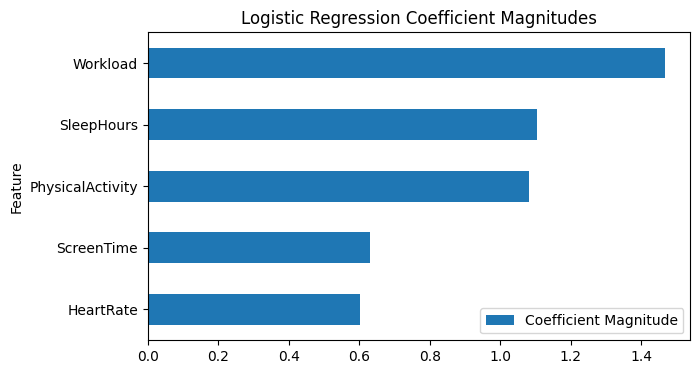


Files Saved:
- stress_dataset.csv
- logistic_regression_stress.pkl
- random_forest_stress.pkl


In [1]:

 # ======================================================================
#   STRESS LEVEL PREDICTION USING MACHINE LEARNING (FULL PROJECT)
#   ONE-CELL GOOGLE COLAB CODE (DATA CREATION → CLEANING → ML → VISUALS)
# ======================================================================

# -----------------------------
# 1. Import Libraries
# -----------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import joblib

# -----------------------------
# 2. Create Synthetic Dataset
# -----------------------------
np.random.seed(42)
n = 1200

sleep_hours = np.clip(np.random.normal(7, 1.5, n), 2, 12)
screen_time = np.clip(np.random.normal(6, 2, n), 0.5, 18)
physical_activity = np.clip(np.random.normal(40, 20, n), 0, 180)
heart_rate = np.clip(np.random.normal(72, 10, n), 45, 120)
workload = np.clip(np.random.normal(5, 2.2, n), 0, 10)

score = (
    (8 - sleep_hours) * 0.4 +
    (screen_time - 4) * 0.12 +
    (100 - physical_activity) * 0.02 +
    (heart_rate - 60) * 0.03 +
    workload * 0.25
)

score += np.random.normal(0, 1.5, n)

stress_level = np.where(score < 3.5, "Low",
                 np.where(score < 7.5, "Medium", "High"))

df = pd.DataFrame({
    "SleepHours": sleep_hours,
    "ScreenTime": screen_time,
    "PhysicalActivity": physical_activity,
    "HeartRate": heart_rate,
    "Workload": workload,
    "StressLevel": stress_level
})

# Add missing values
for col in ["SleepHours", "PhysicalActivity"]:
    df.loc[np.random.rand(n) < 0.03, col] = np.nan

print("Dataset Created:")
print(df.head())

# -----------------------------
# 3. Preprocessing
# -----------------------------
X = df.drop(columns=["StressLevel"])
y = df["StressLevel"]

numeric_cols = X.columns

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

imputer = SimpleImputer(strategy="median")
X_train_imp = pd.DataFrame(imputer.fit_transform(X_train), columns=numeric_cols)
X_test_imp = pd.DataFrame(imputer.transform(X_test), columns=numeric_cols)

scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_imp), columns=numeric_cols)
X_test_scaled = pd.DataFrame(scaler.transform(X_test_imp), columns=numeric_cols)

# -----------------------------
# 4. Train ML Models
# -----------------------------
lr = LogisticRegression(max_iter=1000, multi_class="multinomial")
rf = RandomForestClassifier(n_estimators=200, random_state=42)

lr.fit(X_train_scaled, y_train)
rf.fit(X_train_scaled, y_train)

# -----------------------------
# 5. Evaluation
# -----------------------------
y_pred_lr = lr.predict(X_test_scaled)
y_pred_rf = rf.predict(X_test_scaled)

print("\n===== Logistic Regression Report =====")
print(classification_report(y_test, y_pred_lr))

print("\n===== Random Forest Report =====")
print(classification_report(y_test, y_pred_rf))

# -----------------------------
# 6. Confusion Matrices
# -----------------------------
labels = ["Low", "Medium", "High"]

def plot_cm(cm, title):
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.show()

cm_lr = confusion_matrix(y_test, y_pred_lr, labels=labels)
cm_rf = confusion_matrix(y_test, y_pred_rf, labels=labels)

plot_cm(cm_lr, "Logistic Regression - Confusion Matrix")
plot_cm(cm_rf, "Random Forest - Confusion Matrix")

# -----------------------------
# 7. Feature Importance
# -----------------------------
importances = rf.feature_importances_
feat_imp = pd.DataFrame({
    "Feature": numeric_cols,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

print("\nRandom Forest Feature Importance:")
print(feat_imp)

feat_imp.plot(kind="barh", x="Feature", y="Importance", figsize=(7,4))
plt.title("Random Forest Feature Importance")
plt.gca().invert_yaxis()
plt.show()

# Logistic Regression Coefficients
coef_df = pd.DataFrame({
    "Feature": numeric_cols,
    "Coefficient Magnitude": np.sum(np.abs(lr.coef_), axis=0)
}).sort_values(by="Coefficient Magnitude", ascending=False)

print("\nLogistic Regression Coefficients:")
print(coef_df)

coef_df.plot(kind="barh", x="Feature", y="Coefficient Magnitude", figsize=(7,4))
plt.title("Logistic Regression Coefficient Magnitudes")
plt.gca().invert_yaxis()
plt.show()

# -----------------------------
# 8. Save Models & Dataset
# -----------------------------
df.to_csv("stress_dataset.csv", index=False)
joblib.dump(lr, "logistic_regression_stress.pkl")
joblib.dump(rf, "random_forest_stress.pkl")

print("\nFiles Saved:")
print("- stress_dataset.csv")
print("- logistic_regression_stress.pkl")
print("- random_forest_stress.pkl")

# ======================================================================
# END OF ONE-CELL FULL PROJECT CODE
# ======================================================================
